In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import fastf1 as f1
from ing_theme_matplotlib import mpl_style
import mplcyberpunk
from fastf1 import plotting

In [2]:
f1.Cache.enable_cache("../cache")

*Sprint Qualifyng*

In [6]:
SpQuali = f1.get_session(2024, "US", "Sprint Qualifying")
SpQuali.load()

core           INFO 	Loading data for United States Grand Prix - Sprint Qualifying [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	Sprint Qualifying is not supported by Ergast! Limited results are calculated from timing data.
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_da

In [8]:
SpQuali.session_info

{'Meeting': {'Key': 1247,
  'Name': 'United States Grand Prix',
  'OfficialName': 'FORMULA 1 PIRELLI UNITED STATES GRAND PRIX 2024',
  'Location': 'Austin',
  'Number': 19,
  'Country': {'Key': 19, 'Code': 'USA', 'Name': 'United States'},
  'Circuit': {'Key': 9, 'ShortName': 'Austin'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9612,
 'Type': 'Qualifying',
 'Name': 'Sprint Qualifying',
 'StartDate': datetime.datetime(2024, 10, 18, 16, 30),
 'EndDate': datetime.datetime(2024, 10, 18, 17, 14),
 'GmtOffset': datetime.timedelta(days=-1, seconds=68400),
 'Path': '2024/2024-10-20_United_States_Grand_Prix/2024-10-18_Sprint_Qualifying/'}

In [9]:
SpQuali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
1,VER,Red Bull Racing,NaN,1.0,NaT,
63,RUS,Mercedes,NaN,2.0,NaT,
16,LEC,Ferrari,NaN,3.0,NaT,
4,NOR,McLaren,NaN,4.0,NaT,
55,SAI,Ferrari,NaN,5.0,NaT,
27,HUL,Haas F1 Team,NaN,6.0,NaT,
44,HAM,Mercedes,NaN,7.0,NaT,
20,MAG,Haas F1 Team,NaN,8.0,NaT,
22,TSU,RB,NaN,9.0,NaT,
43,COL,Williams,NaN,10.0,NaT,


In [10]:
SpQuali.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:17:14.614000,SAI,55,NaT,1.0,1.0,0 days 00:15:05.819000,NaT,NaT,0 days 00:00:48.802000,...,True,Ferrari,0 days 00:15:05.819000,2024-10-18 21:32:11.781,1,NaN,False,,False,False
1,0 days 00:18:48.757000,SAI,55,0 days 00:01:34.143000,2.0,1.0,NaT,NaT,0 days 00:00:25.482000,0 days 00:00:37.754000,...,True,Ferrari,0 days 00:17:14.614000,2024-10-18 21:34:20.576,1,NaN,False,,False,True
2,0 days 00:21:00.367000,SAI,55,0 days 00:02:11.610000,3.0,1.0,NaT,NaT,0 days 00:00:40.942000,0 days 00:00:48.363000,...,True,Ferrari,0 days 00:18:48.757000,2024-10-18 21:35:54.719,1,NaN,False,,False,True
3,0 days 00:23:10.137000,SAI,55,0 days 00:02:09.770000,4.0,1.0,NaT,NaT,0 days 00:00:41.929000,0 days 00:00:47.572000,...,True,Ferrari,0 days 00:21:00.367000,2024-10-18 21:38:06.329,1,NaN,False,,False,True
4,0 days 00:24:44.246000,SAI,55,0 days 00:01:34.109000,5.0,1.0,NaT,NaT,0 days 00:00:25.389000,0 days 00:00:37.814000,...,True,Ferrari,0 days 00:23:10.137000,2024-10-18 21:40:16.099,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0 days 00:16:51.971000,ZHO,24,0 days 00:01:36.472000,2.0,1.0,NaT,NaT,0 days 00:00:26.381000,0 days 00:00:38.601000,...,True,Kick Sauber,0 days 00:15:15.499000,2024-10-18 21:32:21.461,1,NaN,False,,False,True
202,0 days 00:19:15.713000,ZHO,24,0 days 00:02:23.742000,3.0,1.0,NaT,0 days 00:19:13.886000,0 days 00:00:41.317000,0 days 00:00:56.979000,...,True,Kick Sauber,0 days 00:16:51.971000,2024-10-18 21:33:57.933,1,NaN,False,,False,False
203,0 days 00:24:04.586000,ZHO,24,NaT,4.0,2.0,0 days 00:21:48.954000,NaT,NaT,0 days 00:00:49.732000,...,False,Kick Sauber,0 days 00:19:15.713000,2024-10-18 21:36:21.675,1,NaN,False,,False,False
204,0 days 00:25:39.779000,ZHO,24,0 days 00:01:35.193000,5.0,2.0,NaT,NaT,0 days 00:00:25.772000,0 days 00:00:38.170000,...,False,Kick Sauber,0 days 00:24:04.586000,2024-10-18 21:41:10.548,1,NaN,True,TRACK LIMITS AT TURN 19 LAP 6,False,True


In [11]:
ver = SpQuali.get_driver("VER")
ver

DriverNumber                                                          1
BroadcastName                                              M VERSTAPPEN
Abbreviation                                                        VER
DriverId                                                               
TeamName                                                Red Bull Racing
TeamColor                                                        3671C6
TeamId                                                                 
FirstName                                                           Max
LastName                                                     Verstappen
FullName                                                 Max Verstappen
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         NED
Position                                                            1.0
ClassifiedPosition                                              

In [14]:
ver_laps =  SpQuali.laps.pick_driver("VER")
ver_lap_time = ver_laps["LapTime"]
ver_sec1 = ver_laps["Sector1Time"]
ver_sec2 = ver_laps["Sector2Time"]
ver_sec3 = ver_laps["Sector3Time"]
ver_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
24,NaT,NaT,0 days 00:00:48.093000,0 days 00:00:39.020000,173.0,147.0,214.0,240.0
25,0 days 00:01:34.698000,0 days 00:00:25.512000,0 days 00:00:37.903000,0 days 00:00:31.283000,236.0,186.0,209.0,325.0
26,0 days 00:02:13.740000,0 days 00:00:41.912000,0 days 00:00:52.448000,0 days 00:00:39.380000,151.0,137.0,160.0,227.0
27,0 days 00:02:05.241000,0 days 00:00:37.724000,0 days 00:00:50.268000,0 days 00:00:37.249000,156.0,147.0,214.0,267.0
28,0 days 00:01:33.908000,0 days 00:00:25.238000,0 days 00:00:37.737000,0 days 00:00:30.933000,236.0,189.0,210.0,325.0
29,0 days 00:02:07.460000,0 days 00:00:34.778000,0 days 00:00:52.269000,0 days 00:00:40.413000,160.0,148.0,NaN,185.0
30,NaT,NaT,0 days 00:00:45.806000,0 days 00:00:32.794000,180.0,158.0,215.0,267.0
31,0 days 00:01:33.290000,0 days 00:00:25.144000,0 days 00:00:37.369000,0 days 00:00:30.777000,240.0,190.0,209.0,325.0
32,0 days 00:02:10.501000,0 days 00:00:33.945000,0 days 00:00:54.769000,0 days 00:00:41.787000,161.0,139.0,NaN,201.0
33,NaT,NaT,0 days 00:00:45.440000,0 days 00:00:38.907000,189.0,142.0,215.0,286.0


In [15]:
fastest_ver = ver_laps.pick_fastest()
tele_ver = fastest_ver.get_telemetry().add_distance()
tele_ver.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,227,5,11744
3,227,5,11855
4,239,6,10791
5,241,6,10875
6,244,6,10960
...,...,...,...
719,211,5,11024
720,214,5,11081
721,217,5,11281
722,221,5,11481


In [16]:
rus = SpQuali.get_driver("RUS")
rus

DriverNumber                                                         63
BroadcastName                                                 G RUSSELL
Abbreviation                                                        RUS
DriverId                                                               
TeamName                                                       Mercedes
TeamColor                                                        27F4D2
TeamId                                                                 
FirstName                                                        George
LastName                                                        Russell
FullName                                                 George Russell
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         GBR
Position                                                            2.0
ClassifiedPosition                                              

In [17]:
rus_laps = SpQuali.laps.pick_driver("RUS")
rus_lap_time = rus_laps["LapTime"]
rus_sec1 = rus_laps["Sector1Time"]
rus_sec2 = rus_laps["Sector2Time"]
rus_sec3 = rus_laps["Sector3Time"]
rus_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
68,NaT,NaT,0 days 00:00:47.508000,0 days 00:00:41.498000,157.0,168.0,215.0,221.0
69,0 days 00:01:34.273000,0 days 00:00:25.371000,0 days 00:00:37.656000,0 days 00:00:31.246000,234.0,191.0,210.0,327.0
70,0 days 00:02:16.786000,0 days 00:00:46.131000,0 days 00:00:49.260000,0 days 00:00:41.395000,136.0,134.0,87.0,242.0
71,NaT,0 days 00:00:52.222000,0 days 00:00:50.598000,0 days 00:01:05.194000,144.0,124.0,208.0,239.0
72,0 days 00:01:34.125000,0 days 00:00:25.494000,0 days 00:00:37.611000,0 days 00:00:31.020000,233.0,192.0,210.0,328.0
73,0 days 00:02:05.634000,0 days 00:00:36.962000,0 days 00:00:46.159000,0 days 00:00:42.513000,178.0,142.0,NaN,268.0
74,NaT,NaT,0 days 00:00:48.176000,0 days 00:00:39.159000,175.0,159.0,215.0,151.0
75,0 days 00:01:33.544000,0 days 00:00:25.307000,0 days 00:00:37.291000,0 days 00:00:30.946000,238.0,192.0,209.0,328.0
76,0 days 00:02:20.170000,0 days 00:00:44.885000,0 days 00:00:50.092000,0 days 00:00:45.193000,145.0,135.0,NaN,260.0
77,NaT,0 days 00:01:07.188000,0 days 00:00:49.170000,0 days 00:00:40.914000,157.0,142.0,214.0,239.0


In [18]:
fastest_rus = rus_laps.pick_fastest()
tele_rus = fastest_rus.get_telemetry().add_distance()
tele_rus.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,228,5,10701
3,230,5,10801
4,234,6,11002
5,239,6,11377
6,241,6,11434
...,...,...,...
707,209,4,11455
708,215,5,11668
709,216,5,11682
710,218,5,11696


In [19]:
lec = SpQuali.get_driver("LEC")
lec

DriverNumber                                                         16
BroadcastName                                                 C LECLERC
Abbreviation                                                        LEC
DriverId                                                               
TeamName                                                        Ferrari
TeamColor                                                        E80020
TeamId                                                                 
FirstName                                                       Charles
LastName                                                        Leclerc
FullName                                                Charles Leclerc
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         MON
Position                                                            3.0
ClassifiedPosition                                              

In [20]:
lec_laps = SpQuali.laps.pick_driver("LEC")
lec_lap_time = lec_laps["LapTime"]
lec_sec1 = lec_laps["Sector1Time"]
lec_sec2 = lec_laps["Sector2Time"]
lec_sec3 = lec_laps["Sector3Time"]
lec_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
12,NaT,NaT,0 days 00:00:45.135000,0 days 00:00:42.128000,198.0,166.0,211.0,299.0
13,0 days 00:01:33.896000,0 days 00:00:25.396000,0 days 00:00:37.639000,0 days 00:00:30.861000,237.0,190.0,213.0,327.0
14,0 days 00:02:08.678000,0 days 00:00:37.605000,0 days 00:00:49.500000,0 days 00:00:41.573000,142.0,135.0,NaN,226.0
15,NaT,0 days 00:01:26.524000,0 days 00:00:53.101000,0 days 00:00:51.553000,168.0,161.0,211.0,222.0
16,0 days 00:01:33.647000,0 days 00:00:25.431000,0 days 00:00:37.374000,0 days 00:00:30.842000,232.0,191.0,211.0,326.0
17,0 days 00:02:09.334000,0 days 00:00:34.471000,0 days 00:00:47.356000,0 days 00:00:47.507000,170.0,142.0,NaN,198.0
18,NaT,NaT,0 days 00:00:44.883000,0 days 00:00:41.554000,171.0,167.0,213.0,273.0
19,0 days 00:01:33.392000,0 days 00:00:25.225000,0 days 00:00:37.409000,0 days 00:00:30.758000,237.0,191.0,211.0,326.0
20,0 days 00:02:05.648000,0 days 00:00:37.231000,0 days 00:00:48.805000,0 days 00:00:39.612000,157.0,133.0,NaN,229.0
21,NaT,NaT,0 days 00:00:46.485000,0 days 00:00:38.870000,173.0,142.0,215.0,270.0


In [21]:
fastest_lec = lec_laps.pick_fastest()
tele_lec = fastest_lec.get_telemetry().add_distance()
tele_lec.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,225,5,11094
3,229,5,10534
4,233,5,10666
5,238,6,10799
6,240,6,10955
...,...,...,...
719,208,5,11109
720,214,5,11420
721,217,5,11658
722,221,5,11896


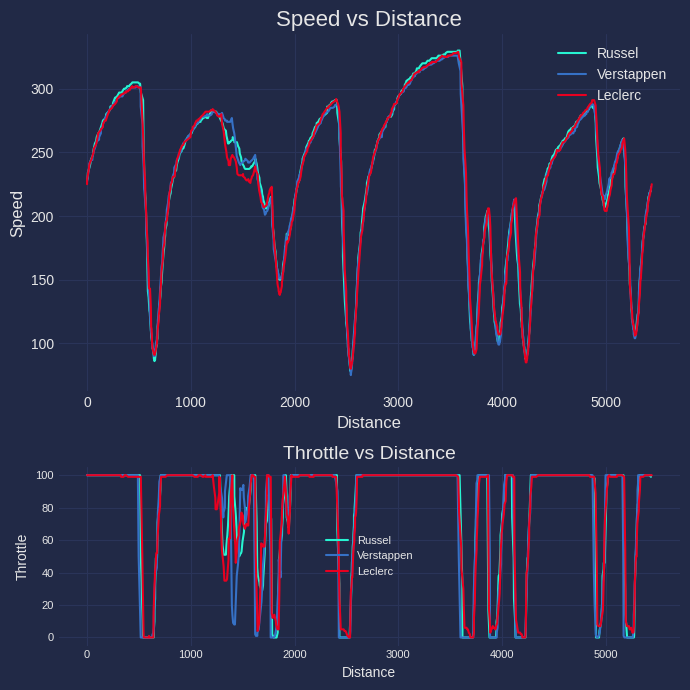

In [22]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = quali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_rus.Distance, tele_rus.Speed, label="Russel", color=get_driver_color("RUS")
)
ax[0].plot(
    tele_ver.Distance, tele_ver.Speed, label="Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_lec.Distance, tele_lec.Speed, label="Leclerc", color=get_driver_color("LEC")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_rus.Distance, tele_rus.Throttle, label="Russel", color=get_driver_color("RUS")
)
ax[1].plot(
    tele_ver.Distance, tele_ver.Throttle, label="Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_lec.Distance, tele_lec.Throttle, label="Leclerc", color=get_driver_color("LEC")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()

In [23]:
def convert_to_normal(time):
    if pd.isna(time):
        return time

    time_str = str(time)
    parts = time_str.split()

    days = int(parts[0])
    minutes, seconds_with_microseconds = parts[2].split(":")[1:]
    seconds, microseconds = seconds_with_microseconds.split(".")

    minutes = int(minutes)
    seconds = int(seconds)
    microseconds = int(microseconds)

    total_microseconds = (
        days * 86400000000 + minutes * 60000000 + seconds * 1000000 + microseconds
    )

    minutes, remaining_microseconds = divmod(total_microseconds, 60000000)
    seconds, microseconds = divmod(remaining_microseconds, 1000000)

    normal_time = f"{minutes:02d}:{seconds:02d}.{microseconds:06d}"
    return normal_time

In [24]:
driver2_sectors = pd.DataFrame(
    {
        "Driver": ["Russel"] * len(rus_sec1),
        "Sector1Time": rus_sec1,
        "Sector2Time": rus_sec2,
        "Sector3Time": rus_sec3,
        "Lap Time": rus_lap_time,
    }
)


driver1_sectors = pd.DataFrame(
    {
        "Driver": ["Verstappen"] * len(ver_sec1),
        "Sector1Time": ver_sec1,
        "Sector2Time": ver_sec2,
        "Sector3Time": ver_sec3,
        "Lap Time": ver_lap_time,
    }
)

driver3_sectors = pd.DataFrame(
    {
        "Driver": ["Leclerc"] * len(lec_sec1),
        "Sector1Time": lec_sec1,
        "Sector2Time": lec_sec2,
        "Sector3Time": lec_sec3,
        "Lap Time": lec_lap_time,
    }
)



all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors],
    ignore_index=True,
)
all_drivers_sectors["Sector1Time"] = all_drivers_sectors["Sector1Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Sector2Time"] = all_drivers_sectors["Sector2Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Sector3Time"] = all_drivers_sectors["Sector3Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Lap Time"] = all_drivers_sectors["Lap Time"].apply(
    convert_to_normal
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Verstappen,00:25.512000,00:37.903000,00:31.283000,01:34.698000
2,Verstappen,00:41.912000,00:52.448000,00:39.380000,02:13.740000
3,Verstappen,00:37.724000,00:50.268000,00:37.249000,02:05.241000
4,Verstappen,00:25.238000,00:37.737000,00:30.933000,01:33.908000
5,Verstappen,00:34.778000,00:52.269000,00:40.413000,02:07.460000
7,Verstappen,00:25.144000,00:37.369000,00:30.777000,01:33.290000
8,Verstappen,00:33.945000,00:54.769000,00:41.787000,02:10.501000
10,Verstappen,00:25.001000,00:37.309000,00:30.523000,01:32.833000
11,Verstappen,00:33.253000,00:53.451000,00:46.215000,02:12.919000
13,Russel,00:25.371000,00:37.656000,00:31.246000,01:34.273000


*Sprint*

In [25]:

sprint = f1.get_session(2024, "US", "Sprint")
sprint.load()

core           INFO 	Loading data for United States Grand Prix - Sprint [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INF

In [26]:
sprint.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
1,VER,Red Bull Racing,1.0,1.0,0 days 00:31:06.146000,Finished
55,SAI,Ferrari,5.0,2.0,0 days 00:00:03.882000,Finished
4,NOR,McLaren,4.0,3.0,0 days 00:00:06.240000,Finished
16,LEC,Ferrari,3.0,4.0,0 days 00:00:06.956000,Finished
63,RUS,Mercedes,2.0,5.0,0 days 00:00:15.766000,Finished
44,HAM,Mercedes,7.0,6.0,0 days 00:00:18.724000,Finished
20,MAG,Haas F1 Team,8.0,7.0,0 days 00:00:25.161000,Finished
27,HUL,Haas F1 Team,6.0,8.0,0 days 00:00:26.588000,Finished
11,PER,Red Bull Racing,11.0,9.0,0 days 00:00:29.950000,Finished
81,PIA,McLaren,16.0,10.0,0 days 00:00:37.059000,Finished


In [27]:
laps = sprint.laps
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:47:44.404000,VER,1,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:39.197000,...,False,Red Bull Racing,0 days 00:46:05.307000,2024-10-19 18:03:51.406,1,1.0,False,,False,False
1,0 days 00:49:23.092000,VER,1,0 days 00:01:38.688000,2.0,1.0,NaT,NaT,0 days 00:00:26.929000,0 days 00:00:39.274000,...,False,Red Bull Racing,0 days 00:47:44.404000,2024-10-19 18:05:30.503,1,1.0,False,,False,True
2,0 days 00:51:00.998000,VER,1,0 days 00:01:37.906000,3.0,1.0,NaT,NaT,0 days 00:00:26.506000,0 days 00:00:39.092000,...,False,Red Bull Racing,0 days 00:49:23.092000,2024-10-19 18:07:09.191,1,1.0,False,,False,True
3,0 days 00:52:39.148000,VER,1,0 days 00:01:38.150000,4.0,1.0,NaT,NaT,0 days 00:00:26.527000,0 days 00:00:39.192000,...,False,Red Bull Racing,0 days 00:51:00.998000,2024-10-19 18:08:47.097,1,1.0,False,,False,True
4,0 days 00:54:17.574000,VER,1,0 days 00:01:38.426000,5.0,1.0,NaT,NaT,0 days 00:00:26.642000,0 days 00:00:39.102000,...,False,Red Bull Racing,0 days 00:52:39.148000,2024-10-19 18:10:25.247,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0 days 01:11:23.303000,BOT,77,0 days 00:01:40.367000,15.0,1.0,NaT,NaT,0 days 00:00:27.011000,0 days 00:00:40.071000,...,False,Kick Sauber,0 days 01:09:42.936000,2024-10-19 18:27:29.035,1,19.0,False,,False,True
376,0 days 01:13:02.945000,BOT,77,0 days 00:01:39.642000,16.0,1.0,NaT,NaT,0 days 00:00:26.898000,0 days 00:00:39.713000,...,False,Kick Sauber,0 days 01:11:23.303000,2024-10-19 18:29:09.402,1,19.0,False,,False,True
377,0 days 01:14:42.741000,BOT,77,0 days 00:01:39.796000,17.0,1.0,NaT,NaT,0 days 00:00:26.914000,0 days 00:00:39.793000,...,False,Kick Sauber,0 days 01:13:02.945000,2024-10-19 18:30:49.044,1,19.0,False,,False,True
378,0 days 01:16:23.081000,BOT,77,0 days 00:01:40.340000,18.0,1.0,NaT,NaT,0 days 00:00:26.936000,0 days 00:00:39.952000,...,False,Kick Sauber,0 days 01:14:42.741000,2024-10-19 18:32:28.840,1,19.0,False,,False,True


In [30]:
ver_sprint = sprint.laps.pick_driver("VER")
fastest_lap_ver_sprint = ver_sprint.pick_fastest().LapTime
ver_sprint_lap_time = ver_sprint["LapTime"]
ver_sprint_sec1 = ver_sprint["Sector1Time"]
ver_sprint_sec2 = ver_sprint["Sector2Time"]
ver_sprint_sec3 = ver_sprint["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_ver_sprint),
    "which was in Lap number",
    ver_sprint.pick_fastest().LapNumber,
)
ver_sprint.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:37.463000 which was in Lap number 19.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:39.197000,0 days 00:00:32.649000,222.0,181.0,202.0,307.0
1,0 days 00:01:38.688000,0 days 00:00:26.929000,0 days 00:00:39.274000,0 days 00:00:32.485000,217.0,180.0,201.0,305.0
2,0 days 00:01:37.906000,0 days 00:00:26.506000,0 days 00:00:39.092000,0 days 00:00:32.308000,221.0,180.0,202.0,309.0
3,0 days 00:01:38.150000,0 days 00:00:26.527000,0 days 00:00:39.192000,0 days 00:00:32.431000,222.0,180.0,202.0,305.0
4,0 days 00:01:38.426000,0 days 00:00:26.642000,0 days 00:00:39.102000,0 days 00:00:32.682000,NaN,181.0,201.0,308.0


In [31]:
fastest_lap_sprint_ver = ver_sprint.pick_fastest()
tele_sprint_ver = fastest_lap_sprint_ver.get_telemetry().add_distance()
speed_sprint_ver = tele_sprint_ver.Speed
tele_sprint_ver.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,212,5,11105
3,214,5,11147
4,217,5,11230
5,221,5,11360
6,226,5,11491
...,...,...,...
770,205,4,10810
771,209,5,10811
772,212,5,10998
773,215,5,11185


In [32]:
sai_sprint = sprint.laps.pick_driver("SAI")
fastest_lap_sai_sprint = sai_sprint.pick_fastest().LapTime
sai_sprint_lap_time = sai_sprint["LapTime"]
sai_sprint_sec1 = sai_sprint["Sector1Time"]
sai_sprint_sec2 = sai_sprint["Sector2Time"]
sai_sprint_sec3 = sai_sprint["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_sai_sprint),
    "which was in Lap number",
    sai_sprint.pick_fastest().LapNumber,
)
sai_sprint.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:37.552000 which was in Lap number 19.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
19,NaT,NaT,0 days 00:00:39.883000,0 days 00:00:33.307000,211.0,183.0,206.0,309.0
20,0 days 00:01:38.506000,0 days 00:00:26.851000,0 days 00:00:38.586000,0 days 00:00:33.069000,205.0,189.0,208.0,333.0
21,0 days 00:01:38.300000,0 days 00:00:26.783000,0 days 00:00:38.847000,0 days 00:00:32.670000,203.0,182.0,208.0,344.0
22,0 days 00:01:38.825000,0 days 00:00:26.434000,0 days 00:00:39.604000,0 days 00:00:32.787000,218.0,178.0,205.0,339.0
23,0 days 00:01:38.329000,0 days 00:00:26.470000,0 days 00:00:38.996000,0 days 00:00:32.863000,223.0,185.0,204.0,329.0


In [33]:
fastest_lap_sprint_sai = sai_sprint.pick_fastest()
tele_sprint_sai = fastest_lap_sprint_sai.get_telemetry().add_distance()
speed_sprint_sai = tele_sprint_sai.Speed
tele_sprint_sai.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,220,5,11648
3,222,5,11648
4,225,5,11648
5,231,5,11877
6,234,5,11387
...,...,...,...
769,205,4,10965
770,212,5,11050
771,215,5,11272
772,218,5,11495


In [28]:
nor_sprint = sprint.laps.pick_driver("NOR")
fastest_lap_nor_sprint = nor_sprint.pick_fastest().LapTime
nor_sprint_lap_time = nor_sprint["LapTime"]
nor_sprint_sec1 = nor_sprint["Sector1Time"]
nor_sprint_sec2 = nor_sprint["Sector2Time"]
nor_sprint_sec3 = nor_sprint["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_nor_sprint),
    "which was in Lap number",
    nor_sprint.pick_fastest().LapNumber,
)
nor_sprint.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:38.045000 which was in Lap number 17.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
38,NaT,NaT,0 days 00:00:39.227000,0 days 00:00:32.882000,210.0,185.0,204.0,302.0
39,0 days 00:01:38.583000,0 days 00:00:26.977000,0 days 00:00:38.879000,0 days 00:00:32.727000,213.0,183.0,205.0,323.0
40,0 days 00:01:38.048000,0 days 00:00:26.414000,0 days 00:00:39.041000,0 days 00:00:32.593000,219.0,183.0,205.0,318.0
41,0 days 00:01:38.440000,0 days 00:00:26.610000,0 days 00:00:38.886000,0 days 00:00:32.944000,222.0,179.0,206.0,325.0
42,0 days 00:01:38.576000,0 days 00:00:26.720000,0 days 00:00:39.218000,0 days 00:00:32.638000,214.0,181.0,205.0,313.0


In [29]:
fastest_lap_sprint_nor = nor_sprint.pick_fastest()
tele_sprint_nor = fastest_lap_sprint_nor.get_telemetry().add_distance()
speed_sprint_nor = tele_sprint_nor.Speed
tele_sprint_nor.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,216,5,11324
3,218,5,11368
4,221,5,11456
5,223,5,11752
6,227,5,11262
...,...,...,...
733,201,5,10832
734,206,5,11025
735,211,5,11218
736,217,5,11411


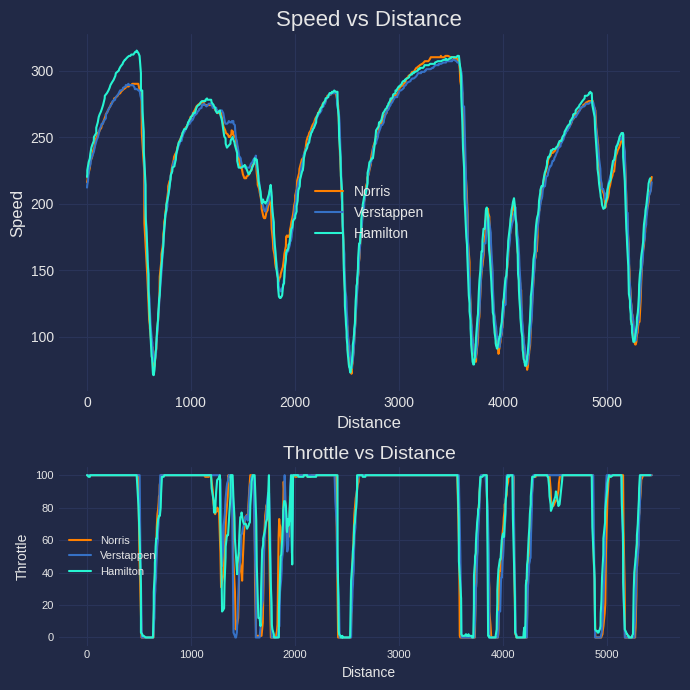

In [34]:
def get_driver_color(driver_abbreviation):
    driver = sprint.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_sprint_nor.Distance,
    tele_sprint_nor.Speed,
    label="Norris",
    color=get_driver_color("NOR"),
)
ax[0].plot(
    tele_sprint_ver.Distance,
    tele_sprint_ver.Speed,
    label="Verstappen",
    color=get_driver_color("VER"),
)
ax[0].plot(
    tele_sprint_sai.Distance,
    tele_sprint_sai.Speed,
    label="Hamilton",
    color=get_driver_color("HAM"),
)
ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_sprint_nor.Distance,
    tele_sprint_nor.Throttle,
    label="Norris",
    color=get_driver_color("NOR"),
)
ax[1].plot(
    tele_sprint_ver.Distance,
    tele_sprint_ver.Throttle,
    label="Verstappen",
    color=get_driver_color("VER"),
)
ax[1].plot(
    tele_sprint_sai.Distance,
    tele_sprint_sai.Throttle,
    label="Hamilton",
    color=get_driver_color("HAM"),
)
ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()

*Qualifyng*

In [3]:
quali = f1.get_session(2024, "US", "Qualifying")
quali.load()

core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req           

In [4]:
quali.session_info

{'Meeting': {'Key': 1247,
  'Name': 'United States Grand Prix',
  'OfficialName': 'FORMULA 1 PIRELLI UNITED STATES GRAND PRIX 2024',
  'Location': 'Austin',
  'Number': 19,
  'Country': {'Key': 19, 'Code': 'USA', 'Name': 'United States'},
  'Circuit': {'Key': 9, 'ShortName': 'Austin'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9608,
 'Type': 'Qualifying',
 'Name': 'Qualifying',
 'StartDate': datetime.datetime(2024, 10, 19, 17, 0),
 'EndDate': datetime.datetime(2024, 10, 19, 18, 0),
 'GmtOffset': datetime.timedelta(days=-1, seconds=68400),
 'Path': '2024/2024-10-20_United_States_Grand_Prix/2024-10-19_Qualifying/'}

In [5]:
quali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
4,NOR,McLaren,NaN,1.0,NaT,
1,VER,Red Bull Racing,NaN,2.0,NaT,
55,SAI,Ferrari,NaN,3.0,NaT,
16,LEC,Ferrari,NaN,4.0,NaT,
81,PIA,McLaren,NaN,5.0,NaT,
63,RUS,Mercedes,NaN,6.0,NaT,
10,GAS,Alpine,NaN,7.0,NaT,
14,ALO,Aston Martin,NaN,8.0,NaT,
20,MAG,Haas F1 Team,NaN,9.0,NaT,
11,PER,Red Bull Racing,NaN,10.0,NaT,


In [35]:
quali.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:16:18.655000,NOR,4,NaT,1.0,1.0,0 days 00:14:17.483000,NaT,NaT,0 days 00:00:43.192000,...,False,McLaren,0 days 00:14:17.483000,2024-10-19 22:01:04.583,1,NaN,False,,False,False
1,0 days 00:17:52.684000,NOR,4,0 days 00:01:34.029000,2.0,1.0,NaT,NaT,0 days 00:00:25.670000,0 days 00:00:37.455000,...,False,McLaren,0 days 00:16:18.655000,2024-10-19 22:03:05.755,1,NaN,False,,False,True
2,0 days 00:19:49.918000,NOR,4,0 days 00:01:57.234000,3.0,1.0,NaT,0 days 00:19:48.282000,0 days 00:00:32.541000,0 days 00:00:45.367000,...,False,McLaren,0 days 00:17:52.684000,2024-10-19 22:04:39.784,1,NaN,False,,False,False
3,0 days 00:24:41.776000,NOR,4,NaT,4.0,2.0,0 days 00:22:37.223000,NaT,NaT,0 days 00:00:49.427000,...,True,McLaren,0 days 00:19:49.918000,2024-10-19 22:06:37.018,1,NaN,False,,False,False
4,0 days 00:26:15.392000,NOR,4,0 days 00:01:33.616000,5.0,2.0,NaT,NaT,0 days 00:00:25.308000,0 days 00:00:37.438000,...,True,McLaren,0 days 00:24:41.776000,2024-10-19 22:11:28.876,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,0 days 00:23:00.353000,ZHO,24,0 days 00:01:35.112000,5.0,2.0,NaT,NaT,0 days 00:00:25.654000,0 days 00:00:38.207000,...,True,Kick Sauber,0 days 00:21:25.241000,2024-10-19 22:08:12.341,1,NaN,True,TRACK LIMITS AT TURN 12 LAP 6,False,True
277,0 days 00:24:52.966000,ZHO,24,0 days 00:01:52.613000,6.0,2.0,NaT,0 days 00:24:51.247000,0 days 00:00:30,0 days 00:00:43.544000,...,True,Kick Sauber,0 days 00:23:00.353000,2024-10-19 22:09:47.453,1,NaN,False,,False,False
278,0 days 00:30:05.456000,ZHO,24,NaT,7.0,3.0,0 days 00:27:53.317000,NaT,NaT,0 days 00:00:51.652000,...,True,Kick Sauber,0 days 00:24:52.966000,2024-10-19 22:11:40.066,1,NaN,False,,False,False
279,0 days 00:31:39.684000,ZHO,24,0 days 00:01:34.228000,8.0,3.0,NaT,NaT,0 days 00:00:25.531000,0 days 00:00:37.663000,...,True,Kick Sauber,0 days 00:30:05.456000,2024-10-19 22:16:52.556,1,NaN,False,,False,True


In [36]:
nor_laps = quali.laps.pick_driver("NOR")
nor_lap_time = nor_laps["LapTime"]
nor_sec1 = nor_laps["Sector1Time"]
nor_sec2 = nor_laps["Sector2Time"]
nor_sec3 = nor_laps["Sector3Time"]
nor_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:43.192000,0 days 00:00:45.665000,159.0,171.0,213.0,294.0
1,0 days 00:01:34.029000,0 days 00:00:25.670000,0 days 00:00:37.455000,0 days 00:00:30.904000,236.0,190.0,208.0,326.0
2,0 days 00:01:57.234000,0 days 00:00:32.541000,0 days 00:00:45.367000,0 days 00:00:39.326000,167.0,145.0,NaN,212.0
3,NaT,NaT,0 days 00:00:49.427000,0 days 00:00:40.001000,172.0,100.0,214.0,288.0
4,0 days 00:01:33.616000,0 days 00:00:25.308000,0 days 00:00:37.438000,0 days 00:00:30.870000,236.0,188.0,209.0,328.0
5,0 days 00:02:07.180000,0 days 00:00:38.075000,0 days 00:00:46.733000,0 days 00:00:42.372000,159.0,138.0,136.0,230.0
6,0 days 00:02:22.963000,0 days 00:00:39.779000,0 days 00:00:47.848000,0 days 00:00:55.336000,167.0,133.0,213.0,211.0
7,0 days 00:01:38.948000,0 days 00:00:25.558000,0 days 00:00:37.427000,0 days 00:00:35.963000,238.0,184.0,NaN,330.0
8,NaT,NaT,0 days 00:00:42.108000,0 days 00:00:42.312000,198.0,173.0,215.0,306.0
9,0 days 00:01:32.851000,0 days 00:00:25.187000,0 days 00:00:37.066000,0 days 00:00:30.598000,237.0,193.0,210.0,330.0


In [37]:
fastest_nor = nor_laps.pick_fastest()
tele_nor = fastest_nor.get_telemetry().add_distance()
tele_nor.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,230,5,11031
3,232,5,10919
4,236,6,10696
5,239,6,10989
6,240,6,11089
...,...,...,...
706,208,5,11040
707,214,5,11314
708,216,5,11458
709,219,5,11602


In [39]:
ver_laps = quali.laps.pick_driver("VER")
ver_lap_time = ver_laps["LapTime"]
ver_sec1 = ver_laps["Sector1Time"]
ver_sec2 = ver_laps["Sector2Time"]
ver_sec3 = ver_laps["Sector3Time"]
ver_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
16,NaT,NaT,0 days 00:00:48.962000,0 days 00:00:39.907000,162.0,169.0,214.0,270.0
17,0 days 00:01:33.690000,0 days 00:00:25.150000,0 days 00:00:37.430000,0 days 00:00:31.110000,240.0,187.0,207.0,328.0
18,0 days 00:01:53.762000,0 days 00:00:35.936000,0 days 00:00:42.094000,0 days 00:00:35.732000,215.0,172.0,NaN,231.0
19,NaT,NaT,0 days 00:00:47.906000,0 days 00:00:35.307000,164.0,165.0,215.0,239.0
20,0 days 00:01:33.046000,0 days 00:00:25.016000,0 days 00:00:37.262000,0 days 00:00:30.768000,242.0,190.0,210.0,327.0
21,0 days 00:02:07.654000,0 days 00:00:35.098000,0 days 00:00:52.274000,0 days 00:00:40.282000,103.0,157.0,NaN,222.0
22,NaT,NaT,0 days 00:00:50.903000,0 days 00:00:36.856000,130.0,151.0,215.0,249.0
23,0 days 00:01:33.052000,0 days 00:00:24.939000,0 days 00:00:37.303000,0 days 00:00:30.810000,235.0,189.0,211.0,328.0
24,0 days 00:01:46.674000,0 days 00:00:29.045000,0 days 00:00:42.418000,0 days 00:00:35.211000,200.0,171.0,NaN,251.0
25,NaT,NaT,0 days 00:00:45.906000,0 days 00:00:36.601000,167.0,172.0,216.0,245.0


In [40]:
fastest_ver = ver_laps.pick_fastest()
tele_ver = fastest_ver.get_telemetry().add_distance()
tele_ver.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,212,4,11747
3,221,4,11421
4,239,6,10768
5,244,6,10768
6,248,6,11014
...,...,...,...
709,217,5,10979
710,220,5,11181
711,223,5,11383
712,226,5,11586


In [42]:
sai_laps = quali.laps.pick_driver("SAI")
sai_lap_time = sai_laps["LapTime"]
sai_sec1 = sai_laps["Sector1Time"]
sai_sec2 = sai_laps["Sector2Time"]
sai_sec3 = sai_laps["Sector3Time"]
sai_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
33,NaT,NaT,0 days 00:00:46.275000,0 days 00:00:39.725000,172.0,145.0,213.0,299.0
34,0 days 00:01:34.104000,0 days 00:00:25.411000,0 days 00:00:37.647000,0 days 00:00:31.046000,239.0,190.0,209.0,330.0
35,0 days 00:01:59.226000,0 days 00:00:34.606000,0 days 00:00:47.008000,0 days 00:00:37.612000,167.0,154.0,NaN,274.0
36,NaT,NaT,0 days 00:00:52.468000,0 days 00:00:40.017000,173.0,148.0,211.0,131.0
37,0 days 00:01:33.556000,0 days 00:00:25.268000,0 days 00:00:37.348000,0 days 00:00:30.940000,237.0,191.0,209.0,329.0
38,0 days 00:02:11.357000,0 days 00:00:38.014000,0 days 00:00:51.182000,0 days 00:00:42.161000,153.0,131.0,98.0,229.0
39,0 days 00:02:25.419000,0 days 00:00:45.671000,0 days 00:00:53.107000,0 days 00:00:46.641000,83.0,133.0,212.0,246.0
40,0 days 00:01:45.581000,0 days 00:00:25.151000,0 days 00:00:37.331000,0 days 00:00:43.099000,238.0,191.0,NaN,330.0
41,NaT,NaT,0 days 00:00:50.182000,0 days 00:00:40.454000,156.0,135.0,214.0,282.0
42,0 days 00:01:33.433000,0 days 00:00:25.282000,0 days 00:00:37.315000,0 days 00:00:30.836000,238.0,192.0,211.0,329.0


In [43]:
fastest_sai = sai_laps.pick_fastest()
tele_sai = fastest_sai.get_telemetry().add_distance()
tele_sai.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,228,5,11649
3,229,5,11289
4,232,5,10570
5,234,5,10816
6,237,6,11062
...,...,...,...
702,211,5,11520
703,216,5,11567
704,221,5,11614
705,222,5,11281


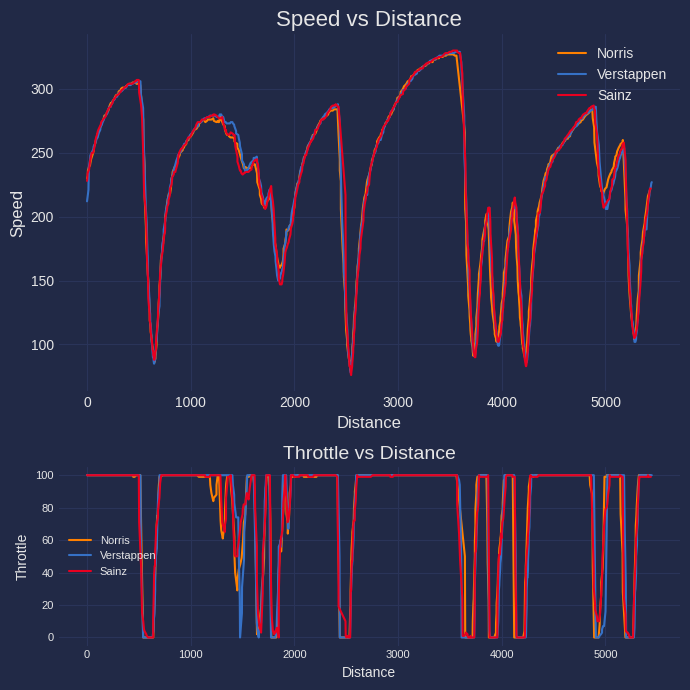

In [44]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = quali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_nor.Distance, tele_nor.Speed, label="Norris", color=get_driver_color("NOR")
)
ax[0].plot(
    tele_ver.Distance, tele_ver.Speed, label="Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_sai.Distance, tele_sai.Speed, label="Sainz", color=get_driver_color("SAI")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_nor.Distance, tele_nor.Throttle, label="Norris", color=get_driver_color("NOR")
)
ax[1].plot(
    tele_ver.Distance, tele_ver.Throttle, label="Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_sai.Distance, tele_sai.Throttle, label="Sainz", color=get_driver_color("SAI")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()

In [45]:
driver1_sectors = pd.DataFrame(
    {
        "Driver": ["Norris"] * len(nor_sec1),
        "Sector1Time": nor_sec1,
        "Sector2Time": nor_sec2,
        "Sector3Time": nor_sec3,
        "Lap Time": nor_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
        "Driver": ["Veerstappen"] * len(ver_sec1),
        "Sector1Time": ver_sec1,
        "Sector2Time": ver_sec2,
        "Sector3Time": ver_sec3,
        "Lap Time": ver_lap_time,
    }
)

driver3_sectors = pd.DataFrame(
    {
        "Driver": ["Sainz"] * len(sai_sec1),
        "Sector1Time": sai_sec1,
        "Sector2Time": sai_sec2,
        "Sector3Time": sai_sec3,
        "Lap Time": sai_lap_time,
    }
)



all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors],
    ignore_index=True,
)
all_drivers_sectors["Sector1Time"] = all_drivers_sectors["Sector1Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Sector2Time"] = all_drivers_sectors["Sector2Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Sector3Time"] = all_drivers_sectors["Sector3Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Lap Time"] = all_drivers_sectors["Lap Time"].apply(
    convert_to_normal
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Norris,00:25.670000,00:37.455000,00:30.904000,01:34.029000
2,Norris,00:32.541000,00:45.367000,00:39.326000,01:57.234000
4,Norris,00:25.308000,00:37.438000,00:30.870000,01:33.616000
5,Norris,00:38.075000,00:46.733000,00:42.372000,02:07.180000
6,Norris,00:39.779000,00:47.848000,00:55.336000,02:22.963000
7,Norris,00:25.558000,00:37.427000,00:35.963000,01:38.948000
9,Norris,00:25.187000,00:37.066000,00:30.598000,01:32.851000
10,Norris,00:32.067000,00:44.991000,00:38.851000,01:55.909000
12,Norris,00:24.992000,00:36.887000,00:30.451000,01:32.330000
13,Norris,00:32.367000,00:48.193000,00:38.448000,01:59.008000


*Race*

In [46]:
race = f1.get_session(2024, "US", "R")
race.load()

core           INFO 	Loading data for United States Grand Prix - Race [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 

In [47]:
race.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
16,LEC,Ferrari,4.0,1.0,0 days 01:35:09.639000,Finished
55,SAI,Ferrari,3.0,2.0,0 days 00:00:08.562000,Finished
1,VER,Red Bull Racing,2.0,3.0,0 days 00:00:19.412000,Finished
4,NOR,McLaren,1.0,4.0,0 days 00:00:20.354000,Finished
81,PIA,McLaren,5.0,5.0,0 days 00:00:21.921000,Finished
63,RUS,Mercedes,20.0,6.0,0 days 00:00:56.295000,Finished
11,PER,Red Bull Racing,9.0,7.0,0 days 00:00:59.072000,Finished
27,HUL,Haas F1 Team,11.0,8.0,0 days 00:01:02.957000,Finished
30,LAW,RB,19.0,9.0,0 days 00:01:10.563000,Finished
43,COL,Williams,15.0,10.0,0 days 00:01:11.979000,Finished


In [48]:
laps = race.laps
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:58:52.942000,VER,1,0 days 00:01:41.657000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:40.291000,...,True,Red Bull Racing,0 days 00:57:10.953000,2024-10-20 19:03:48.551,12,2.0,False,,False,False
1,0 days 01:00:32.933000,VER,1,0 days 00:01:39.991000,2.0,1.0,NaT,NaT,0 days 00:00:26.845000,0 days 00:00:39.996000,...,True,Red Bull Racing,0 days 00:58:52.942000,2024-10-20 19:05:30.540,1,2.0,False,,False,True
2,0 days 01:02:35.782000,VER,1,0 days 00:02:02.849000,3.0,1.0,NaT,NaT,0 days 00:00:26.980000,0 days 00:00:46.144000,...,True,Red Bull Racing,0 days 01:00:32.933000,2024-10-20 19:07:10.531,124,2.0,False,,False,False
3,0 days 01:05:07.321000,VER,1,NaT,4.0,1.0,NaT,NaT,0 days 00:00:40.222000,0 days 00:00:58.115000,...,True,Red Bull Racing,0 days 01:02:35.782000,2024-10-20 19:09:13.380,4,2.0,False,,False,False
4,0 days 01:07:54.867000,VER,1,NaT,5.0,1.0,NaT,NaT,0 days 00:00:40.279000,0 days 00:01:01.864000,...,True,Red Bull Racing,0 days 01:05:07.321000,2024-10-20 19:11:44.919,41,2.0,False,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0 days 02:26:08.719000,PIA,81,0 days 00:01:38.180000,52.0,2.0,NaT,NaT,0 days 00:00:26.214000,0 days 00:00:39.506000,...,True,McLaren,0 days 02:24:30.539000,2024-10-20 20:31:08.137,1,5.0,False,,False,True
1055,0 days 02:27:47.823000,PIA,81,0 days 00:01:39.104000,53.0,2.0,NaT,NaT,0 days 00:00:26.529000,0 days 00:00:40.029000,...,True,McLaren,0 days 02:26:08.719000,2024-10-20 20:32:46.317,1,5.0,False,,False,True
1056,0 days 02:29:25.777000,PIA,81,0 days 00:01:37.954000,54.0,2.0,NaT,NaT,0 days 00:00:26.330000,0 days 00:00:39.257000,...,True,McLaren,0 days 02:27:47.823000,2024-10-20 20:34:25.421,1,5.0,False,,False,True
1057,0 days 02:31:03.701000,PIA,81,0 days 00:01:37.924000,55.0,2.0,NaT,NaT,0 days 00:00:26.501000,0 days 00:00:39.175000,...,True,McLaren,0 days 02:29:25.777000,2024-10-20 20:36:03.375,1,5.0,False,,False,True


In [51]:
lec_race = race.laps.pick_driver("LEC")
fastest_lap_lec_race = lec_race.pick_fastest().LapTime
lec_race_lap_time = lec_race["LapTime"]
lec_race_sec1 = lec_race["Sector1Time"]
lec_race_sec2 = lec_race["Sector2Time"]
lec_race_sec3 = lec_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_lec_race),
    "which was in Lap number",
    lec_race.pick_fastest().LapNumber,
)
lec_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:37.834000 which was in Lap number 39.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
223,0 days 00:01:39.987000,NaT,0 days 00:00:39.463000,0 days 00:00:32.844000,213.0,181.0,199.0,303.0
224,0 days 00:01:40.341000,0 days 00:00:27.122000,0 days 00:00:39.879000,0 days 00:00:33.340000,218.0,180.0,200.0,302.0
225,0 days 00:02:02.873000,0 days 00:00:27.112000,0 days 00:00:45.840000,0 days 00:00:49.921000,219.0,96.0,148.0,216.0
226,NaT,0 days 00:00:40.750000,0 days 00:00:57.615000,0 days 00:00:52.839000,133.0,137.0,171.0,156.0
227,NaT,0 days 00:00:40.913000,0 days 00:01:02.100000,0 days 00:01:05.772000,117.0,108.0,205.0,179.0


In [52]:
fastest_lap_race_lec = lec_race.pick_fastest()
tele_race_lec = fastest_lap_race_lec.get_telemetry().add_distance()
speed_race_lec = tele_race_lec.Speed
tele_race_lec.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,221,5,11601
3,226,5,11597
4,226,5,11241
5,227,5,10886
6,228,6,10531
...,...,...,...
759,205,5,10934
760,210,5,11235
761,216,5,11536
762,216,5,11649


In [53]:
ver_race = race.laps.pick_driver("VER")
fastest_lap_ver_race = ver_race.pick_fastest().LapTime
ver_race_lap_time = ver_race["LapTime"]
ver_race_sec1 = ver_race["Sector1Time"]
ver_race_sec2 = ver_race["Sector2Time"]
ver_race_sec3 = ver_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_ver_race),
    "which was in Lap number",
    ver_race.pick_fastest().LapNumber,
)
ver_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:38.117000 which was in Lap number 42.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,0 days 00:01:41.657000,NaT,0 days 00:00:40.291000,0 days 00:00:33.295000,214.0,169.0,199.0,312.0
1,0 days 00:01:39.991000,0 days 00:00:26.845000,0 days 00:00:39.996000,0 days 00:00:33.150000,215.0,174.0,199.0,306.0
2,0 days 00:02:02.849000,0 days 00:00:26.980000,0 days 00:00:46.144000,0 days 00:00:49.725000,213.0,116.0,156.0,183.0
3,NaT,0 days 00:00:40.222000,0 days 00:00:58.115000,0 days 00:00:53.159000,134.0,156.0,173.0,205.0
4,NaT,0 days 00:00:40.279000,0 days 00:01:01.864000,0 days 00:01:05.480000,149.0,136.0,203.0,130.0


In [54]:
fastest_lap_race_ver = ver_race.pick_fastest()
tele_race_ver = fastest_lap_race_ver.get_telemetry().add_distance()
speed_race_ver = tele_race_ver.Speed
tele_race_ver.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,218,5,11226
3,221,5,11335
4,224,5,11444
5,227,5,11554
6,228,5,11716
...,...,...,...
770,206,4,10872
771,211,5,10848
772,214,5,10997
773,217,5,11146


In [55]:
nor_race = race.laps.pick_driver("NOR")
fastest_lap_nor_race = nor_race.pick_fastest().LapTime
nor_race_lap_time = nor_race["LapTime"]
nor_race_sec1 = nor_race["Sector1Time"]
nor_race_sec2 = nor_race["Sector2Time"]
nor_race_sec3 = nor_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_nor_race),
    "which was in Lap number",
    nor_race.pick_fastest().LapNumber,
)
nor_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:37.679000 which was in Lap number 55.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
722,0 days 00:01:42.902000,NaT,0 days 00:00:40.066000,0 days 00:00:33.837000,206.0,183.0,200.0,308.0
723,0 days 00:01:40.864000,0 days 00:00:27.416000,0 days 00:00:39.906000,0 days 00:00:33.542000,212.0,180.0,201.0,306.0
724,0 days 00:02:04.410000,0 days 00:00:27.316000,0 days 00:00:48.010000,0 days 00:00:49.084000,207.0,104.0,119.0,97.0
725,NaT,0 days 00:00:38.694000,0 days 00:00:58.568000,0 days 00:00:53.408000,119.0,111.0,125.0,173.0
726,NaT,0 days 00:00:39.439000,0 days 00:01:01.675000,0 days 00:01:04.655000,134.0,129.0,198.0,142.0


In [56]:
fastest_lap_race_nor = nor_race.pick_fastest()
tele_race_nor = fastest_lap_race_nor.get_telemetry().add_distance()
speed_race_nor = tele_race_nor.Speed
tele_race_nor.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,223,5,11498
3,226,5,11512
4,230,5,11082
5,234,6,10652
6,235,6,10744
...,...,...,...
752,201,4,11141
753,208,5,10975
754,212,5,11203
755,217,5,11432


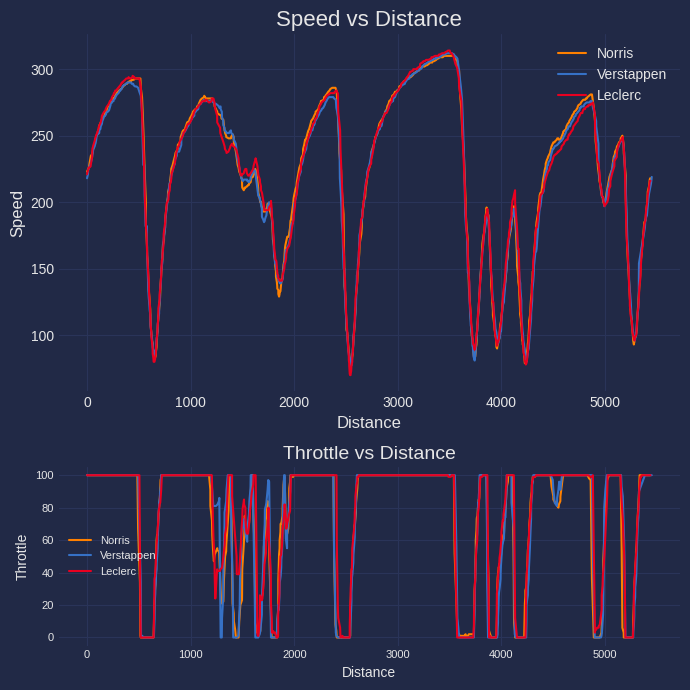

In [57]:
fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_race_nor.Distance,
    tele_race_nor.Speed,
    label="Norris",
    color=get_driver_color("NOR"),
)
ax[0].plot(
    tele_race_ver.Distance,
    tele_race_ver.Speed,
    label="Verstappen",
    color=get_driver_color("VER"),
)
ax[0].plot(
    tele_race_lec.Distance,
    tele_race_lec.Speed,
    label="Leclerc",
    color=get_driver_color("LEC"),
)
ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_race_nor.Distance,
    tele_race_nor.Throttle,
    label="Norris",
    color=get_driver_color("NOR"),
)
ax[1].plot(
    tele_race_ver.Distance,
    tele_race_ver.Throttle,
    label="Verstappen",
    color=get_driver_color("VER"),
)
ax[1].plot(
    tele_race_lec.Distance,
    tele_race_lec.Throttle,
    label="Leclerc",
    color=get_driver_color("LEC"),
)
ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()

In [58]:
driver1_sectors = pd.DataFrame({
    'Driver': ['Norris'] * len(nor_race_sec1),
    'Sector1Time': nor_race_sec1,
    'Sector2Time': nor_race_sec2,
    'Sector3Time': nor_race_sec3,
    'Lap Time' : nor_race_lap_time
})

driver2_sectors = pd.DataFrame({
    'Driver': ['Verstappen'] * len(ver_race_sec1),
    'Sector1Time': ver_race_sec1,
    'Sector2Time': ver_race_sec2,
    'Sector3Time': ver_race_sec3,
    'Lap Time' : ver_race_lap_time
})

driver3_sectors = pd.DataFrame({
    'Driver': ['Leclerc'] * len(lec_race_sec1),
    'Sector1Time': lec_race_sec1,
    'Sector2Time': lec_race_sec2,
    'Sector3Time': lec_race_sec3,
    'Lap Time' : lec_race_lap_time
})


all_drivers_sectors = pd.concat([driver1_sectors, driver2_sectors, driver3_sectors], ignore_index=True)
all_drivers_sectors['Sector1Time'] = all_drivers_sectors['Sector1Time'].apply(convert_to_normal)
all_drivers_sectors['Sector2Time'] = all_drivers_sectors['Sector2Time'].apply(convert_to_normal)
all_drivers_sectors['Sector3Time'] = all_drivers_sectors['Sector3Time'].apply(convert_to_normal)
all_drivers_sectors['Lap Time'] = all_drivers_sectors['Lap Time'].apply(convert_to_normal)
all_drivers_sectors.sort_values(by=["Sector1Time","Sector2Time","Sector3Time"],ascending=True).dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
160,Leclerc,00:26.007000,00:39.647000,00:32.672000,01:38.326000
111,Verstappen,00:26.053000,00:39.898000,00:33.067000,01:39.018000
162,Leclerc,00:26.116000,00:39.514000,00:32.245000,01:37.875000
161,Leclerc,00:26.124000,00:39.533000,00:32.294000,01:37.951000
166,Leclerc,00:26.149000,00:39.261000,00:32.492000,01:37.902000
...,...,...,...,...,...
1,Norris,00:27.416000,00:39.906000,00:33.542000,01:40.864000
5,Norris,00:27.461000,00:40.080000,00:33.122000,01:40.663000
31,Norris,00:46.869000,00:39.710000,00:33.026000,01:59.605000
81,Verstappen,00:47.267000,00:39.643000,00:32.709000,01:59.619000


posx and posy should be finite values
posx and posy should be finite values


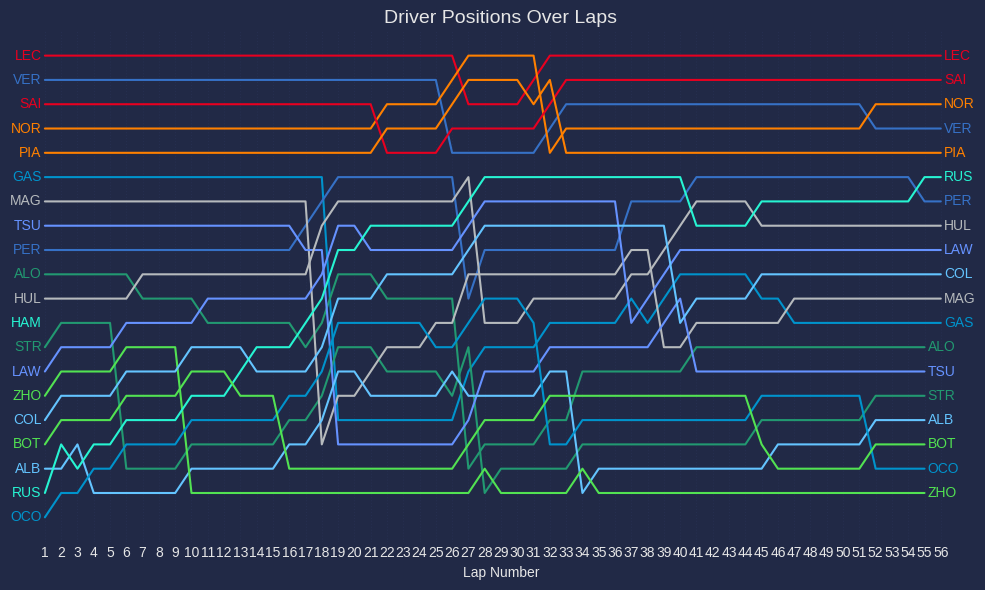

In [59]:
# Get unique drivers and total number of laps
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
nlaps = int(race.laps.LapNumber.unique().max())

# Initialize an empty dictionary to store team colors
team_colors = {}

# Fetch the team color for each driver dynamically and convert to RGB
for driver in drivers_ab:
    driver_object = quali.get_driver(driver)
    hex_color = driver_object.TeamColor
    team_colors[driver] = hex_to_rgb(hex_color)

# Plot each driver's positions with their team color
plt.figure(figsize=(10, 6))  # Adjust figure size
for driver in drivers_ab:
    positions = laps[laps['Driver'] == driver]['Position'].values  
    color = team_colors.get(driver, (0.5, 0.5, 0.5))  # Default to gray if no color is specified
    plt.plot(range(1, len(positions) + 1), positions, label=driver, color=color)
    
    # Annotate driver name at the start of the line
    plt.text(
        1 - 0.2,  # Slightly to the left of the first lap
        positions[0],  # Y-coordinate of the first position
        driver,  # Driver's name
        color=color,  # Use the driver's color
        fontsize=10,  # Font size
        verticalalignment='center',  # Center the text vertically
        horizontalalignment='right'  # Align text to the right of the point
    )
    
    # Annotate driver name at the end of the line
    plt.text(
        len(positions) + 0.2,  # Slightly to the right of the last lap
        positions[-1],  # Y-coordinate of the last position
        driver,  # Driver's name
        color=color,  # Use the driver's color
        fontsize=10,  # Font size
        verticalalignment='center',  # Center the text vertically
        horizontalalignment='left'  # Align text to the left of the point
    )

# Add plot title and labels
plt.title("Driver Positions Over Laps", fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0.5, float(nlaps) + 1.5)  # Extend x-axis to leave space for annotations
plt.xlabel("Lap Number")
plt.ylim(0, 21)
plt.gca().invert_yaxis()  # Invert y-axis so positions are ranked correctly
plt.gca().set_yticks([])
plt.xticks(range(1, nlaps + 1))
plt.tight_layout()
plt.show()

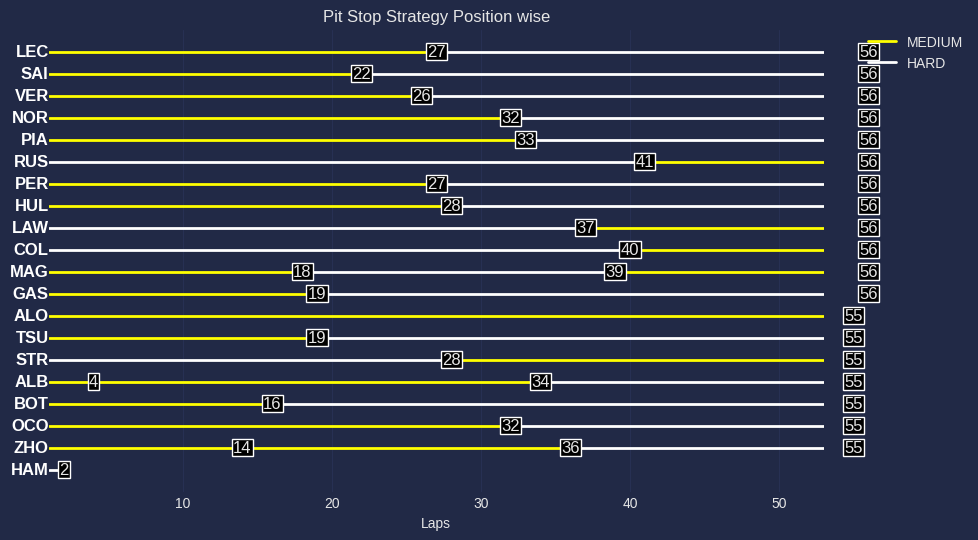

In [60]:
def getDriverPosition(abbreviation: str):
    res = race.results
    c = res["Abbreviation"] == abbreviation
    pos = res.loc[c, ["Position"]]
    posi = pos.iloc[-1]
    return int(posi.iloc[0])


def getCompound(abbreviation: str):
    driver_race = race.laps.pick_driver(abbreviation)
    lastLap = driver_race.LapNumber.count()
    if driver_race["TyreLife"].iloc[0] == 1.0:
        condition = driver_race["TyreLife"] == 1
        driver_comp = driver_race.loc[condition, ["Compound", "LapNumber"]]
        compound = driver_comp.Compound.tolist()
        return compound, driver_comp, lastLap
    else:
        compound = []
        result = []
        for i in range(0, len(driver_race["TyreLife"])):
            if driver_race["TyreLife"].iloc[i] < driver_race["TyreLife"].iloc[i - 1]:
                result.append(
                    {
                        "Compound": driver_race["Compound"].iloc[i],
                        "LapNumber": driver_race["LapNumber"].iloc[i],
                    }
                )
                compound.append(driver_race["Compound"].iloc[i])

        driver_comp = pd.DataFrame(result)
        return compound, driver_comp, lastLap


fig, ax = plt.subplots(figsize=(10, 6))

color_mapping = {
    "MEDIUM": "yellow",
    "SOFT": "red",
    "HARD": "white",
    "INTERMEDIATE": "green",
    "WET": "blue",
}
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
used_labels = set()
for driver in drivers_ab:
    compound, driver_comp, lastLap = getCompound(driver)

    list1 = driver_comp.LapNumber.tolist()
    list1.append(lastLap)
    int_list = [int(x) for x in list1]
    x_points = int_list
    n = len(int_list)
    posi = getDriverPosition(driver)
    y_points = [posi] * n

    for i in range(len(driver_comp.LapNumber)):
        x_segment = [x_points[i], x_points[i + 1]]
        y_segment = [y_points[i], y_points[i + 1]]
        tire_color = color_mapping.get(compound[i], "unknown")
        label = compound[i] if compound[i] not in used_labels else None
        
        ax.plot(x_segment, y_segment, color=tire_color, linewidth=2, label=label)
        used_labels.add(compound[i])

        ax.text(
            x_points[i + 1],
            y_points[i + 1],
            str(x_points[i + 1]),
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", edgecolor="white", pad=1),
        )
        ax.annotate(f'{i}',
                xy=(0, 1),
                xytext=(-10, 0),
                textcoords='offset points',
                va='center',
                ha='right',
                color="white",
                fontweight='bold')
    ax.text(
        x_points[0], 
        y_points[0], 
        driver, 
        fontsize=12, 
        ha='right', 
        va='center', 
        color="white", 
        fontweight='bold',
    )
    
ax.set_xlim(1, 53)
ax.invert_yaxis()
ax.set_ylim(21, 0)
ax.set_title("Pit Stop Strategy Position wise")
ax.set_xlabel("Laps")
plt.gca().set_yticks([])
ax.axvline(x=0, color='black', linewidth=2)
ax.grid(True, linestyle="-", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()


In [61]:
res = race.results
drivers = res['Abbreviation'].tolist()
fastest_speed = pd.DataFrame(columns=['Driver', 'Speed'])
for i in drivers:
    tele = race.laps.pick_driver(i)
    speed = tele.SpeedST.max()
    df = pd.DataFrame({'Driver': [i], 'Speed': [speed]})
    fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)
fastest_speed.sort_values(by="Speed",ascending=True)
    

/tmp/ipykernel_65402/2770152713.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)


,Driver,Speed
2,VER,312.0
19,HAM,317.0
4,PIA,321.0
18,ZHO,327.0
12,ALO,328.0
7,HUL,329.0
1,SAI,330.0
17,OCO,330.0
11,GAS,331.0
9,COL,332.0


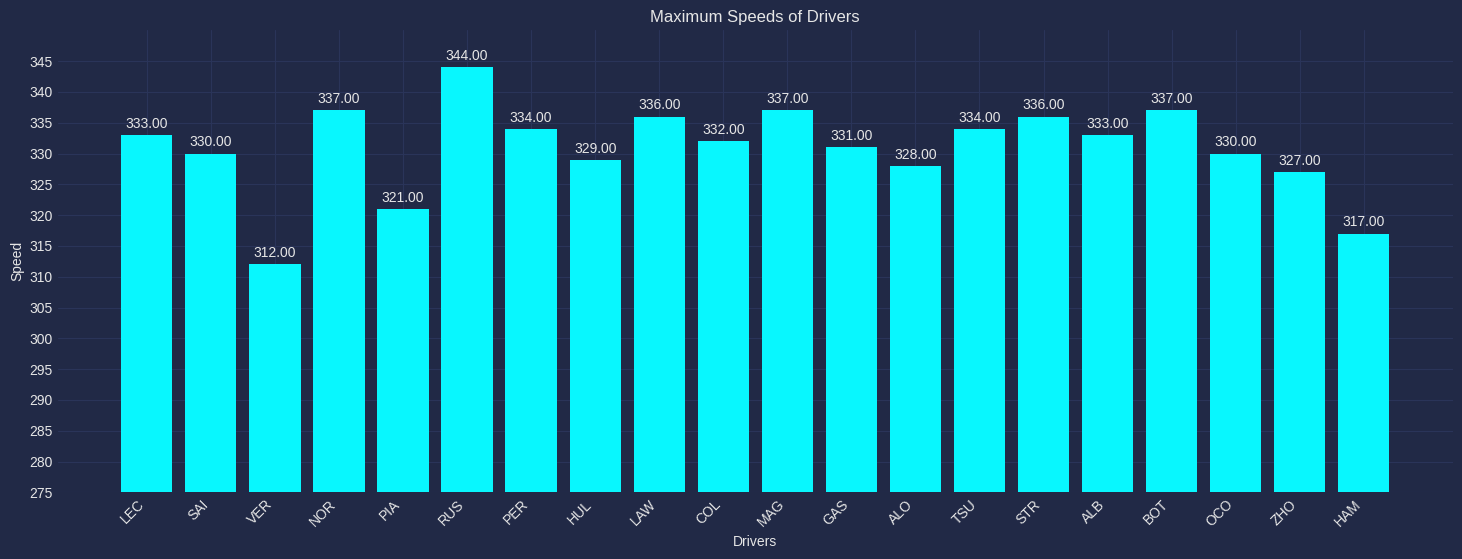

In [62]:
fig,ax = plt.subplots(figsize=(18, 6))


bars = ax.bar(fastest_speed['Driver'], fastest_speed['Speed'])

ax.set_xlabel('Drivers')

ax.set_ylabel('Speed')

ax.set_title('Maximum Speeds of Drivers')

plt.xticks(rotation=45, ha='right')

y_min = 275
y_max = np.ceil(fastest_speed['Speed'].max() / 5) * 5 + 5
y_ticks = np.arange(y_min, y_max, 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Display the plot
plt.show()

In [63]:
plotting.setup_mpl()

In [72]:
laps_lec = laps.pick_driver("LEC")
laps_ver = laps.pick_driver("VER")

fastest_lec = laps_lec.pick_fastest().get_telemetry().add_distance()
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()

fastest_lec["Driver"] = "LEC"
fastest_ver["Driver"] = "VER"
telemetry = pd.concat([fastest_lec,fastest_ver])

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [73]:
num_minisectors = 25

total_distance = total_distance = max(telemetry['Distance'])

minisector_length = total_distance / num_minisectors

In [74]:
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [75]:

telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [76]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,LEC,251.440000
1,1,VER,248.357143
2,2,LEC,286.700000
3,2,VER,283.086957
4,3,LEC,179.694444
5,3,VER,177.526316
6,4,LEC,164.194444
7,4,VER,159.684211
8,5,LEC,257.760000
9,5,VER,256.347826


In [77]:
# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [78]:

# Join the fastest driver per minisector with the full telemetry
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == 'LEC', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 2

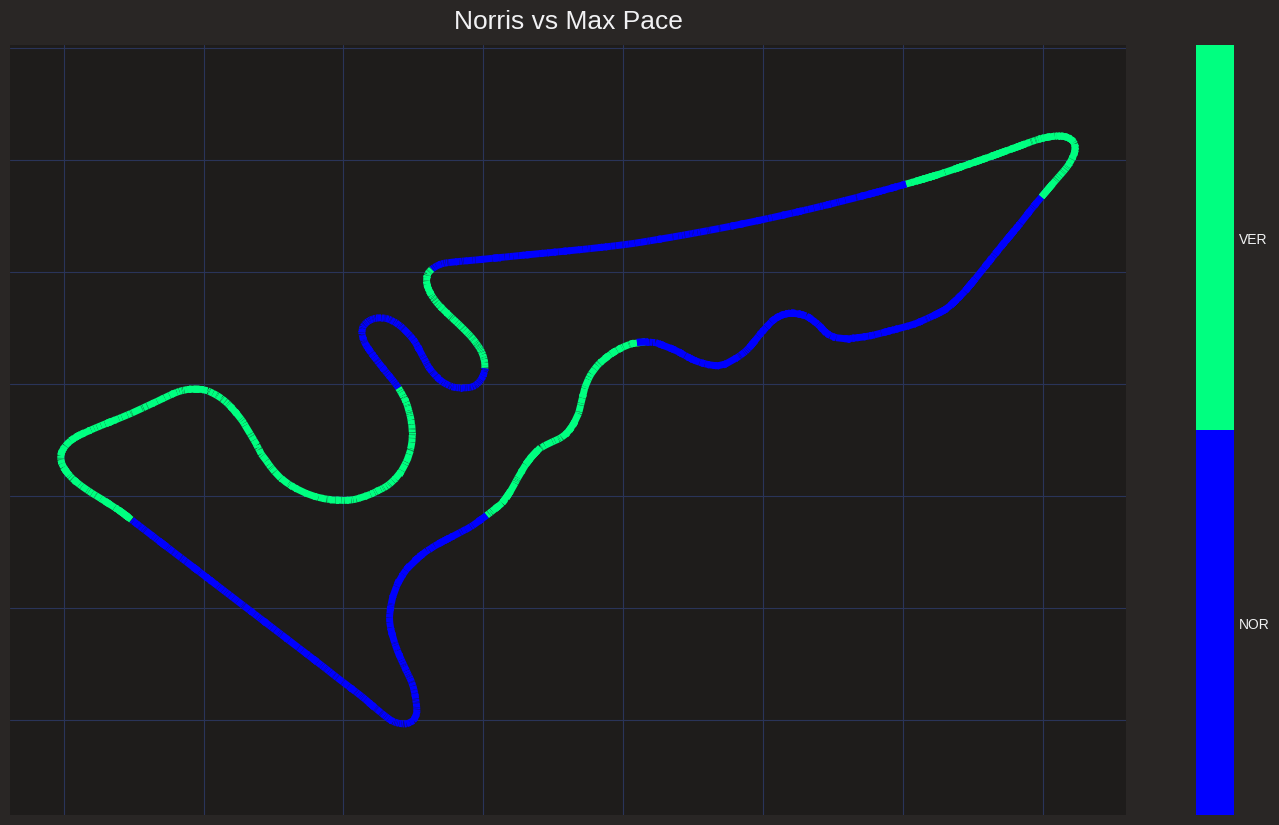

In [79]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

# Adjust the colorbar settings
cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['NOR', 'VER'])
plt.title("Norris vs Max Pace")
plt.show()
